# Детекция лиц

<b>Детекция</b> - обнаружение объектов
<br/>
<img src="notebook_images/scary.png">

# Рассмотрение методов детекции лиц

## Классификаторы Хаара

Старый метод компьютерного зрения, представленный в opencv с 2000 года. Это модель машинного обучения с функциями, выбранными специально для обнаружения объектов. Классификаторы Хаара быстры, но имеют низкую точность.
    <img src="notebook_images/haar_primitives.jpeg"/>
*Примитивы Хаара*

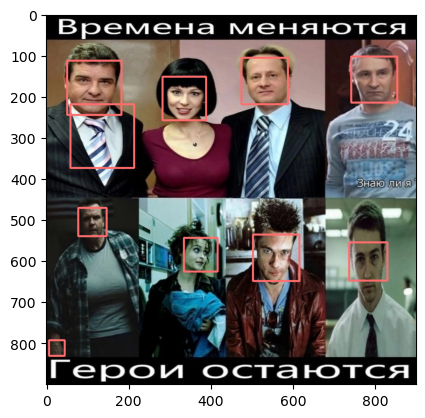

In [15]:
import cv2
import matplotlib.pyplot as plt

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
image = cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)
faces = faceCascade.detectMultiScale(image, scaleFactor=1.1, flags=cv2.CASCADE_SCALE_IMAGE)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 110, 110), 3)
plt.imshow(image)
plt.show()

# HOG: гистограмма ориентированных градиентов
HOG - это более новый метод создания функции обнаружения объектов: он начал использоваться с 2005 года. Он основан на вычислении градиентов на пикселях ваших изображений. Эти функции затем передаются в алгоритм машинного обучения, например SVM. Он имеет лучшую точность, чем классификаторы Хаара.

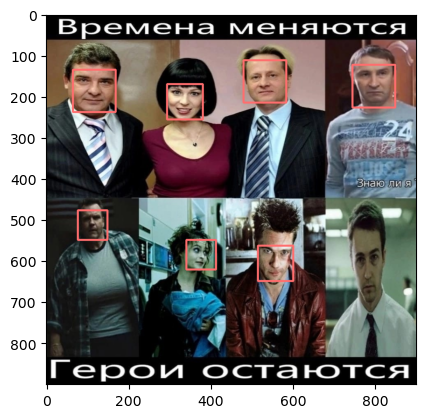

In [16]:
import dlib
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()
faces = detector(image)
for rect in faces:
    left, top, right, bottom = rect.left(), rect.top(), rect.right(), rect.bottom()
    cv2.rectangle(image, (left, top), (right, bottom), (255, 110, 110), 3)
plt.imshow(image)
plt.show()

# CNN

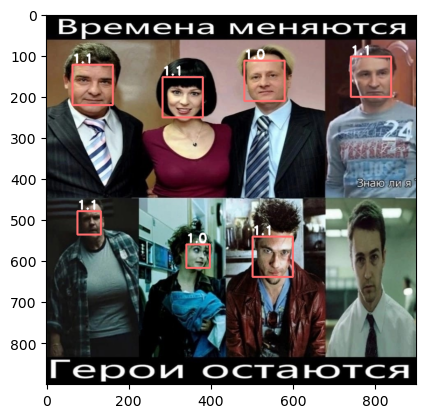

In [17]:
import dlib
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('test.jpg'), cv2.COLOR_BGR2RGB)
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
faces = cnn_face_detector(image, 1)
for face in faces:
    rect, confidence = face.rect, face.confidence
    left, top, right, bottom = rect.left(), rect.top(), rect.right(), rect.bottom()
    cv2.rectangle(image, (left, top), (right, bottom), (255, 110, 110), 3)
    cv2.putText(image, "{:.2}".format(confidence), (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3, 2)
plt.imshow(image)
plt.show()

# MTCNN
## MTCNN — нейронная сеть для детекции лиц
Это каскад свёрточных нейронных сетей. В модели используются 3 сети: P-Net, R-Net и O-net. Каждая последующая нейронная сеть увеличивает точность прогноза.
<img src="notebook_images/mtcnn.png" width=1400>
Первая P-Net на выходе выдаёт координаты ограничивающих прямоугольников предполагаемых лиц. Далее R-net отсекает области, где лиц скорее всего нет и добавляет уровень достоверности к тем областям, которые остались. В третьей сети мы снова избавляемся от прямоугольников с низким уровнем достоверности и добавляем координаты пяти лицевых ориентиров.

2/2 [==============================] - 0s 20ms/step


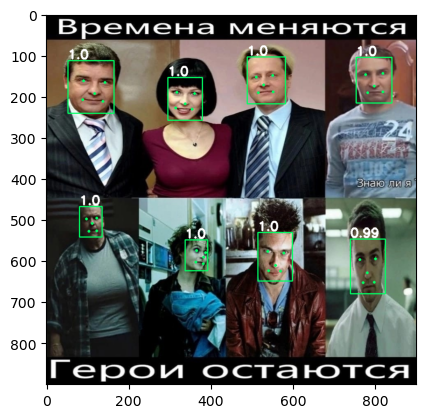

In [7]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
color = (0, 255, 100)

detector = MTCNN()
image = cv2.cvtColor(cv2.imread("test.jpg"), cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(image)
for face in faces:
    bounding_box = face['box']
    keypoints = face['keypoints']
    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  color, 2)
    cv2.putText(image, "{:.2}".format(face['confidence']), (bounding_box[0], bounding_box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3, 2)
    for keypoint in ('left_eye', 'right_eye', 'nose', 'mouth_left', 'mouth_right'):
        cv2.circle(image, (keypoints[keypoint]), 2, color, 2)
    cv2.imwrite("ivan_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.imshow(image)
plt.show()